## Ejercicio 2
Un equipo de investigación, analiza el comportamiento de un harén de cebras las cuales se separan en dos grupos notables, la harén de jóvenes y la harén de adultos. Su comportamiento de movimiento es aleatorio y sigue una caminata aleatoria en 2D, suponga que cada paso (iteración) en simulación es igual a que el harén camine 100 metros aproximadamente.

**Nota**: La posición del Oasis $A=(x_a, y_a)_{inicio}$ y $B=(x_b, y_b)_{fin}$, las define el usuario con coordenadas. Esto se supone era el inciso c, pero yo no le veo caso. De igual forma dejo el código correspondiente después de la declaración de la clase.

### Inciso a
Calcula la distancia recorrida de cada harén que parten del Oasis A hasta alcanzar el Oasis B.

### Pseudocódigo

    inicializamos puntos inicio-fin
    joven y viejo empiezan en punto inicio
    mientras no hallan llega viejo y joven, y no se hayan superado las épocas:
        incrementamos épocas
        si llegó joven y no había llegado antes
            activamos bandera de joven
        si no ha llegado joven
            movemos joven a una posición aleatoria
        si llegó viejo y no había llegado antes
            activamos bandera de viejo
        si no ha llegado viejo
            movemos viejo a una posición aleatoria

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class Point():
    
    def __init__(self, x, y, traveled = 0):
        """
        Método constructor para la clase Point.
        Coordenadas x (int) e y (int)
        """
        # definimos las coordenadas del punto
        self.x = x
        self.y = y
        # cada vez que se cree un punto su distancia recorrida es 0
        self.traveled = traveled
        
    def __eq__(self, another_point):
        """
        Método de igualación. 
        Se basa en que dos puntos son iguales sí y sólo si coordenada a coordena son iguales.
        """
        if isinstance(another_point, Point):
            return self.x == another_point.x and self.y == another_point.y
        return False
        
    def distance(self, another_point):
        """
        Calcula la distancia del punto respecto a otro punto (Point).
        Usa la fórmula de la distancia euclideana.
        """
        return np.sqrt((self.x - another_point.x)**2 + (self.y - another_point.y)**2)
    
    def move_random(self):
        """
        Mueve aleatoriamente una iteración (100 metros) al punto tanto en x como en y.
        """
        # primero vemos si se movera respecto a x o respecto a y
        way = np.random.choice(['x', 'y'])
        # si se mueve en x
        if way == 'x':
            # movimiento aleatorio en x
            x_rand = np.random.choice([100, -100])
            # actualización de posición
            self.x += x_rand
        # si se mueve en y
        elif way == 'y':
            # movimiento aleatorio en y
            y_rand = np.random.choice([100, -100])
            # actualización de posición
            self.y += y_rand
        # actualizamos la distancia recorrida
        self.traveled += 100

Código para pedir al usuario las coordenadas iniciales y finales.

In [ ]:
print('Define posición de Oasis A:')
xa = int(input('Introduce la coordenada x_a: '))
ya = int(input('Introduce la coordenada y_a: '))
A = Point(xa, ya)
print(f'Oasis A en coordenadas: ({A.x},{A.y})')
print('Define posición de Oasis B:')
xb = int(input('Introduce la coordenada x_b: '))
yb = int(input('Introduce la coordenada y_b: '))
B = Point(xb, yb)
print(f'Oasis A en coordenadas: ({B.x},{B.y})')bb

Yo para el desarrollo dejé estos.

In [28]:
xa, ya = 0, 0
xb, yb = 200, 200
A = Point(xa, ya)
B = Point(xb, yb)

In [45]:
np.random.seed(10)
# ambos harenes empiezan en el punto de inicio
haren_young = Point(xa, ya)
haren_old = Point(xa, ya)
# voy a poner un límite de 10,000 iteraciones
limit = 1e4
epochs = 0
# diccionario para definir si han llegado o no
not_arrive = {
    'young':True,
    'old':True
}
# la simulación se hará mientras que no hallan llegado los 2 harenes o si se superó el límite de iteraciones
while (not_arrive['young'] or not_arrive['old']) and epochs < limit:
    # aumentamos iteraciones
    epochs += 1
    print(f'Iteración {epochs}--------------------------------------------------------------')
    # ¿el harén joven llegó al final y no había llegado antes?
    if haren_young == B and not_arrive['young']:
        # ya llegó el harén joven
        print('El harén joven ha llegado al Oasis B', 5*'\n')
        not_arrive['young'] = False
    # en caso contrario se mueve
    elif haren_young != B:
        print(f'El harén joven se ha movido de ({haren_young.x}, {haren_young.y})', end=' ')
        # se mueve harén jóven
        haren_young.move_random()
        print(f'a ({haren_young.x}, {haren_young.y})')
    # ¿el harén viejo llegó al final y no había llegado antes?
    if haren_old == B and not_arrive['old']:
        # ya llegó el harén viejo
        print('El harén viejo ha llegado al Oasis B', 5*'\n')
        not_arrive['old'] = False
    # en caso contrario se mueve
    elif haren_old != B:
        print(f'El harén viejo se ha movido de ({haren_old.x}, {haren_old.y})', end=' ')
        # se mueve harén viejo
        haren_old.move_random()
        print(f'a ({haren_old.x}, {haren_old.y})')

Iteración 1--------------------------------------------------------------
El harén joven se ha movido de (0, 0) a (0, -100)
El harén viejo se ha movido de (0, 0) a (-100, 0)
Iteración 2--------------------------------------------------------------
El harén joven se ha movido de (0, -100) a (-100, -100)
El harén viejo se ha movido de (-100, 0) a (-100, 100)
Iteración 3--------------------------------------------------------------
El harén joven se ha movido de (-100, -100) a (-100, -200)
El harén viejo se ha movido de (-100, 100) a (-200, 100)
Iteración 4--------------------------------------------------------------
El harén joven se ha movido de (-100, -200) a (-100, -100)
El harén viejo se ha movido de (-200, 100) a (-300, 100)
Iteración 5--------------------------------------------------------------
El harén joven se ha movido de (-100, -100) a (0, -100)
El harén viejo se ha movido de (-300, 100) a (-200, 100)
Iteración 6--------------------------------------------------------------


In [51]:
print(f'La distancia recorrida por el harén joven fue de: {haren_young.traveled:,} metros')
print(f'La distancia recorrida por el harén viejo fue de: {haren_old.traveled:,} metros')

La distancia recorrida por el harén joven fue de: 3,800 metros
La distancia recorrida por el harén viejo fue de: 10,200 metros


### Inciso b
Realiza 20 veces la simulación, grafica las distancias promedio para cada harén y la frecuencia con la que llegaron primero al Oasis B. 

#### Pseudocódigo

    for i=1 to 20:
        hacemos proceso del inciso anterior
        guardamos distancias recorridas en tupla
    for i=1 to 20:
        si distancia_joven > distancia_viejo:
            incrementamos frecuencia_viejo 
        en otro caso
            incrementamos frecuencia_joven
    obtenemos promedio de distancias
    graficamos distancias
    graficamos frecuencias

**Solución**

Básicamente nos han pedido que hagamos función el procedimiento del inciso anterior e iteremos 20.

La función deberá retornar las ditancias recorridas de cada harén.

Nota: en caso de que no llegue alguno de los harenes tomará la distancia máxima, la cual sería `epochs * 100`.

In [52]:
def simulate_random_walk_2D() -> tuple[int, int]:
    """
    Realiza una simulación de una caminata aleatoria 2D de dos puntos, los cuales se detienen:
        1. Si llegaron al punto final
        2. Se superó el número de épocas.
    Retorna la distancia total recorrida por simulación (tupla).
    """
    # ambos harenes empiezan en el punto de inicio
    haren_young = Point(xa, ya)
    haren_old = Point(xa, ya)
    # voy a poner un límite de 10,000 iteraciones
    limit = 1e4
    epochs = 0
    # diccionario para definir si han llegado o no
    not_arrive = {
        'young':True,
        'old':True
    }
    # la simulación se hará mientras que no hallan llegado los 2 harenes o si se superó el límite de iteraciones
    while (not_arrive['young'] or not_arrive['old']) and epochs < limit:
        # aumentamos iteraciones
        epochs += 1
        # ¿el harén joven llegó al final y no había llegado antes?
        if haren_young == B and not_arrive['young']:
            # ya llegó el harén joven
            not_arrive['young'] = False
        # en caso contrario se mueve
        elif haren_young != B:
            # se mueve harén jóven
            haren_young.move_random()
        # ¿el harén viejo llegó al final y no había llegado antes?
        if haren_old == B and not_arrive['old']:
            # ya llegó el harén viejo
            not_arrive['old'] = False
        # en caso contrario se mueve
        elif haren_old != B:
            # se mueve harén viejo
            haren_old.move_random()
    return haren_young.traveled, haren_old.traveled

In [55]:
np.random.seed(10)
# hacemos lista  de simulaciones
simulations = [simulate_random_walk_2D() for _ in range(20)]

In [57]:
# diccionario de frecuencias
frecuencies = {
    'young':0,
    'old':0
}
# listas de distancias
distance_young = []
distance_old = []
# vemos para cada simulación de mi lista de simulaciones
for simulation in simulations:
    # tomamos la distancia recorrida por el joven
    distance_traveled_young = simulation[0]
    distance_young.append(distance_traveled_young)
    # lo mismo para la del viejo
    distance_traveled_old = simulation[1]
    distance_old.append(distance_traveled_old)
    # si la distancia que recorrió el joven es mayor que la del viejo
    if distance_traveled_young > distance_traveled_old:
        # llegó antes el viejo: aumentamos frecuencia para viejo
        frecuencies['old'] += 1
    # en caso contrario del joven
    else:
        frecuencies['young'] += 1

#### Gráfico de distancias

**Harén joven**

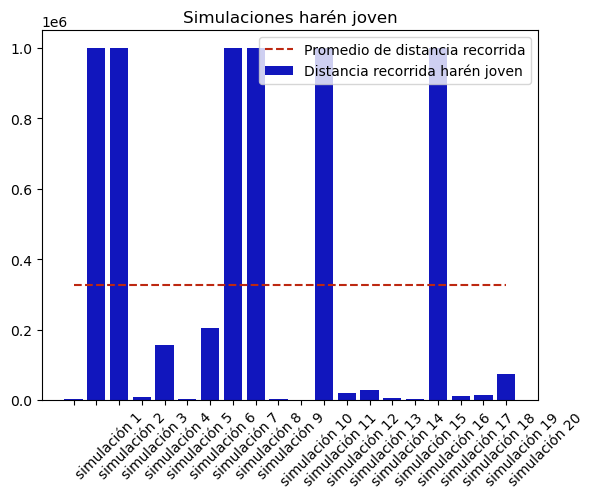

In [72]:
%matplotlib inline
# s.p.g. tomamos el tamaño de la lista de jóvenes: en realidad es el número de simulaciones=20
number_simulations = len(distance_young)
ejex = np.arange(start=0, stop=number_simulations, step=1)
ejex_label = [f'simulación {i+1}' for i in ejex]
# en promedio el harén jove recorrió
mean_haren_young = sum(distance_young)/number_simulations
# graficamos barras del joven
plt.bar(ejex_label, distance_young, label='Distancia recorrida harén joven', color='#1116bd')
# graficamos línea del promedio de las distancias
plt.plot(ejex, [mean_haren_young]*number_simulations, label='Promedio de distancia recorrida', linestyle='--', color='#bd2811')
plt.title('Simulaciones harén joven')
plt.xticks(rotation=45, ha='left')
plt.legend()
plt.show()

**Harén viejo**

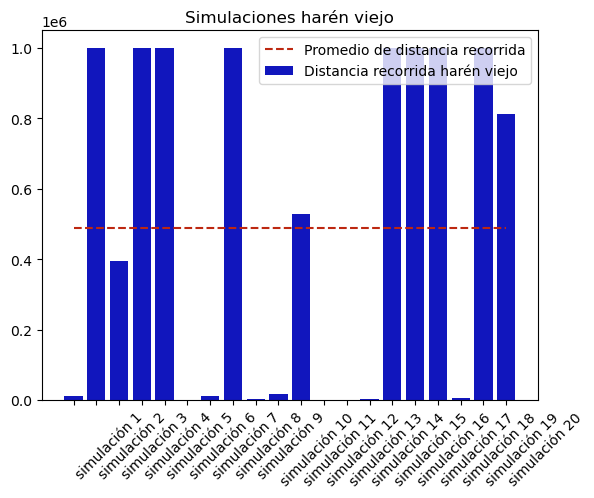

In [73]:
%matplotlib inline
# en promedio el harén jove recorrió
mean_haren_old = sum(distance_old)/number_simulations
# graficamos barras del joven
plt.bar(ejex_label, distance_old, label='Distancia recorrida harén viejo', color='#1116bd')
# graficamos línea del promedio de las distancias
plt.plot(ejex, [mean_haren_old]*number_simulations, label='Promedio de distancia recorrida', linestyle='--', color='#bd2811')
plt.title('Simulaciones harén viejo')
plt.xticks(rotation=45, ha='left')
plt.legend()
plt.show()

#### Gráfico de frecuencias

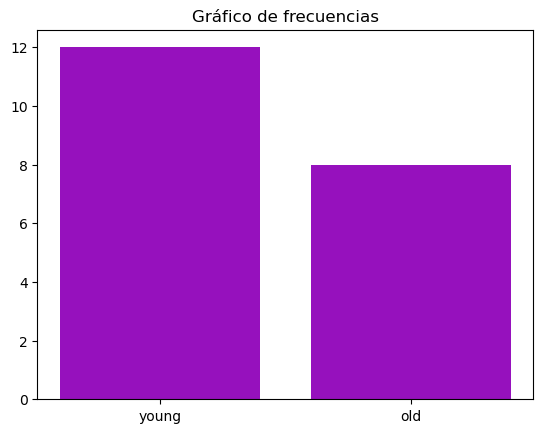

In [74]:
%matplotlib inline
categories = list(frecuencies.keys())
values = list(frecuencies.values())
plt.bar(categories, values, color='#9611bd')
plt.title('Gráfico de frecuencias')
plt.show()